### Differentiation

Remember that the (first) derivative of a function $y = f(x)$, $f'(x_0) = df/dx|_{x_0}$, is also the slope of a tangent to $f$ at the point $x = x_0$. 

Over a short distance $\Delta x$, this slope is $a \sim \Delta y/\Delta x = \Delta f/\Delta x$, so we can estimate this from discrete data as
$$f'(x[i]) \sim (y[i+1] - y[i])/(x[i+1] - x[i])\,.$$
This estimate is called the *forward difference*. 

A comparably accurate estimate is the *backward difference*:
$$f'(x[i]) \sim (y[i] - y[i-1])/(x[i] - x[i-1])\,.$$

Finally, we can combine or average the two to get the *central difference*:
$$f'(x[i]) \sim (y[i+1] - y[i-1])/(x[i+1] - x[i-1])\,.$$

In this short exercise, you will compare these different methods for estimating derivatives to the exact (analytic) value.

1) In a code cell below, insert code to plot $f(x) = sin(x)$ from $0$ to $\pi$ in steps of $π/100$.

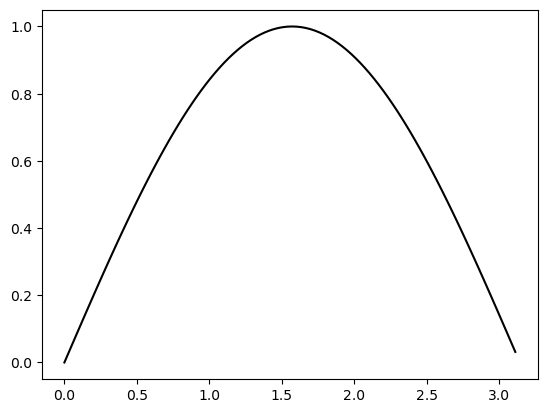

In [1]:
import matplotlib.pyplot as plt
import numpy
from math import pi, sin, cos
# Build a array with value from 0 to pi in steps of pi/100 
n = numpy.arange(0,pi,pi/100)
# get sin value array from 0 to pi in steps of pi/100 
y_sin = numpy.sin(n)

# plot the diagram 
plt.plot(n,y_sin,c='black')
plt.show()

2) Remember that the derivative is the slope of a function at a point. The analytic derivative of $f(x)$ is $df/dx = cos(x)$. Pick a value $x_p$ between 0 and $\pi$, and plot a line passing through the point $(x,y) = (x_p, sin(x_p))$, with slope $cos(x_p)$. You should find that this line is the tangent to the curve $y = sin(x)$. 

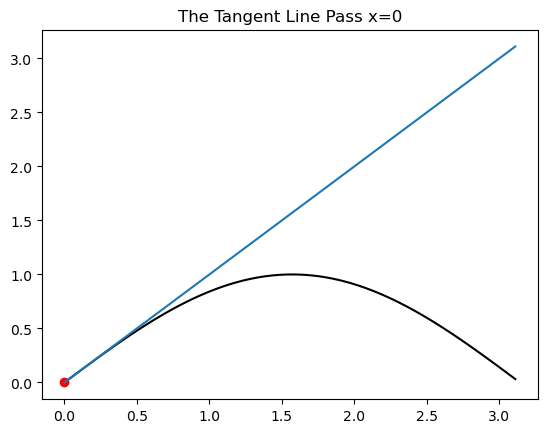

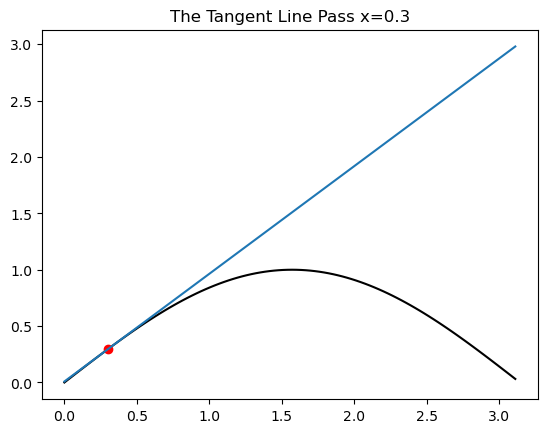

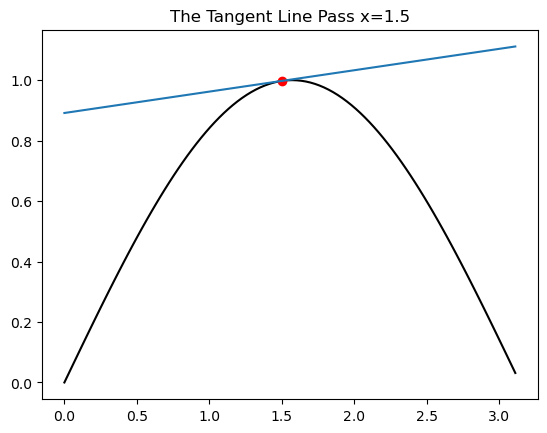

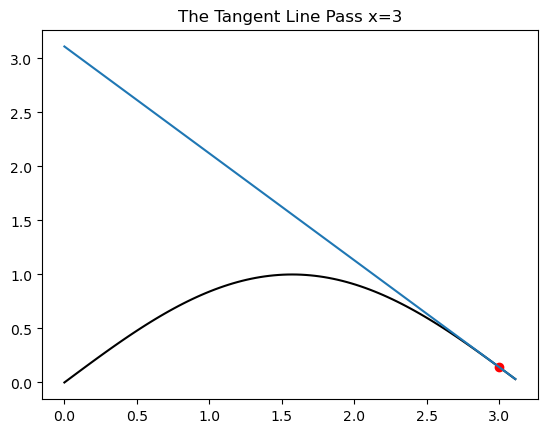

In [2]:
# define a function to describe the tangent line
def line(n,xp):
    slope = cos(xp)
    b = sin(xp) - cos(xp)*xp
    return slope*n + b

# define call the line() function to draw the tangent line
# pass the point (xp,sin(xp))
def tangent_line(xp):
    x = numpy.arange(0,pi,pi/100)
    y = numpy.array(list(map(lambda i: line(i,xp),x)))
    # plot the graph
    tit = "The Tangent Line Pass x={0}"
    plt.title(tit.format(xp))
    plt.plot(n,y_sin,c='black')
    plt.plot(xp,sin(xp),'ro')
    plt.plot(x,y)
    plt.show()

# call the function
tangent_line(0)
tangent_line(0.3)
tangent_line(1.5)
tangent_line(3)

3) Estimate the derivative $df/dx$ numerically, using the **forward difference** method, for $x$ ranging from $\pi/100$ to $99\pi/100$. Plot the calculated value of the derivative versus $x$ and compare to the exact analytic value $cos(x)$. We will call this figure 1.



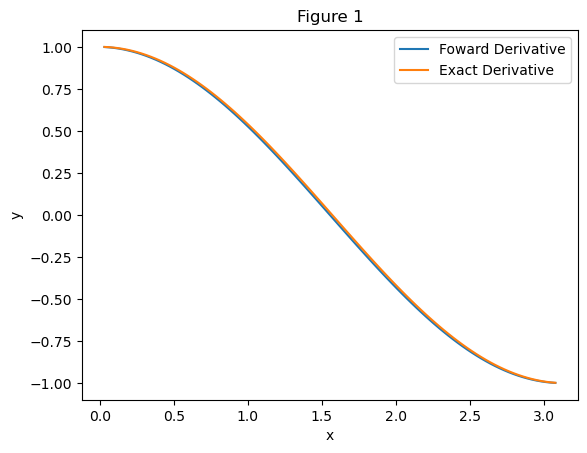

In [3]:
# forward difference
# (𝑦[𝑖+1]−𝑦[𝑖])/(𝑥[𝑖+1]−𝑥[𝑖])

# define a function that use forward difference 
# to get the derivative value at a point
def forward_difference(n):
    return (sin(n+pi/100)-sin(n))/(pi/100)

# Build a array with value from 0 to pi in steps of pi/100 
x_fow = numpy.arange(pi/100,99*pi/100,pi/100)
# get exact derivative value at a point
y_cos = numpy.cos(x_fow)
# get derivative by forward difference 
y_fow = numpy.array(list(map(lambda i: forward_difference(i),x_fow)))

# plot the diagram
plt.plot(x_fow,y_fow,label='Foward Derivative')
plt.plot(x_fow,y_cos,label='Exact Derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Figure 1")
plt.legend(loc='best')
plt.show()

4) Calculate the difference between your estimate and the exact derivative, for each value of $x$, and plot this versus $x$. We will call this figure 2.


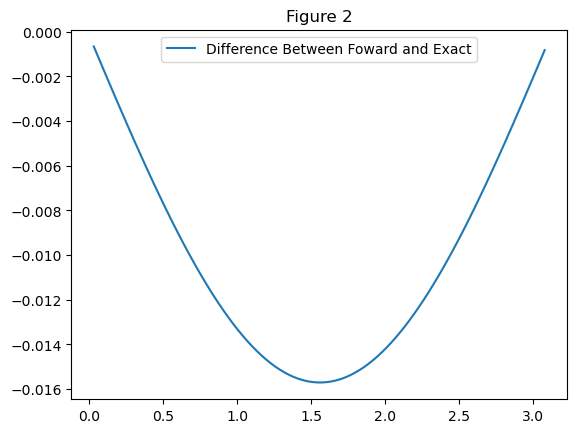

In [4]:
# get the difference between forward difference estimate and the exact derivative
y_d0 = numpy.array(list(map(lambda i: forward_difference(i)-cos(i),x_fow)))

# plot the diagram
plt.plot(x_fow,y_d0,label='Difference Between Foward and Exact')
plt.title("Figure 2")
plt.legend(loc='best')
plt.show()

5) Estimate the derivative using the **backward difference** method from $\pi/100$ to $99\pi/100$ and add these values to figure 1 (using a different point/line colour). Calculate the difference between this estimate and the exact value, and add it to figure 2, using the same new colour.


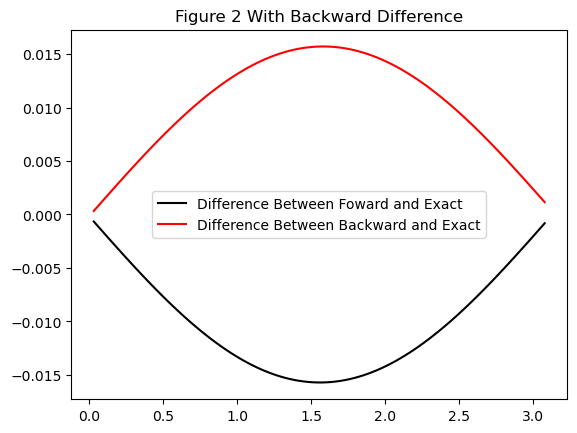

In [5]:
# backward difference
# (𝑦[𝑖]−𝑦[𝑖−1])/(𝑥[𝑖]−𝑥[𝑖−1])

# define a function that use backward difference
# to get the derivative value at a point
def backward_difference(n):
    return (sin(n)-sin(n-pi/100))/(pi/100)

# get the difference between backward difference estimate and the exact derivative
y_d1 = numpy.array(list(map(lambda i: backward_difference(i)-cos(i),x_fow)))

# plot the diagram
plt.plot(x_fow,y_d0,c='black',label='Difference Between Foward and Exact')
plt.plot(x_fow,y_d1,c='red',label='Difference Between Backward and Exact')
plt.title("Figure 2 With Backward Difference")
plt.legend(loc='best')
plt.show()

6) Now calculate the derivative using the **central difference** method, calculated over half steps, i.e. stepping forward and backward by an amount $\pi/200$. Compare to the previous results by plotting the new values on figure 1 and the differences with respect to the exact values on figure 2. (Once again, use a new colour for the lines/points.)


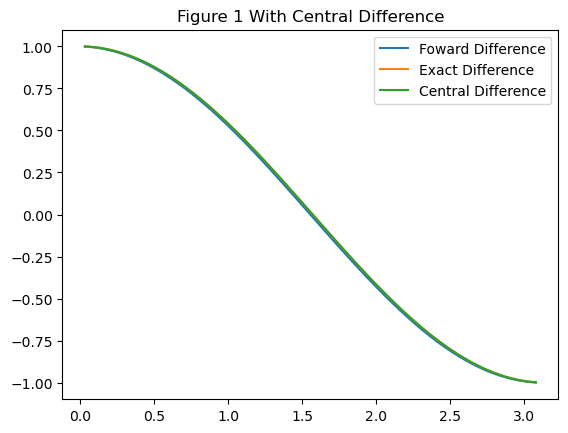

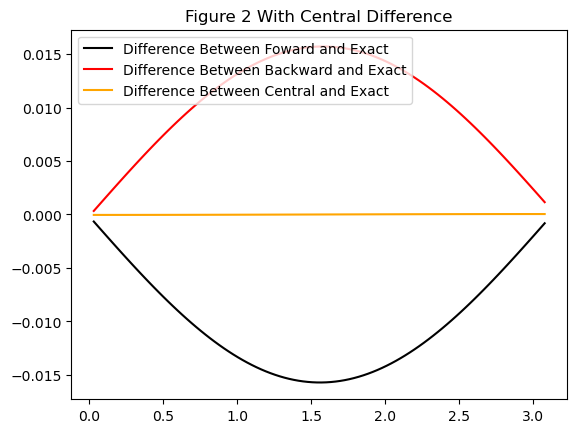

In [6]:
# central difference
# (𝑦[𝑖+1]−𝑦[𝑖−1])/(𝑥[𝑖+1]−𝑥[𝑖−1])

# define a function that use central difference
# to get the derivative value at a point with half steps
def central_difference(n):
    return (sin(n+pi/200)-sin(n-pi/200))/(pi/100)

# get the derivative value of a point by half steps central difference
y_cent = numpy.array(list(map(lambda i: central_difference(i),x_fow)))

# plot the digram (Figure 1) with half steps central difference
plt.plot(x_fow,y_fow,label='Foward Difference')
plt.plot(x_fow,y_cos,label='Exact Difference')
plt.plot(x_fow,y_cent,label='Central Difference')
plt.title("Figure 1 With Central Difference")
plt.legend(loc='best')
plt.show()

# get the difference between half steps central difference estimate and the exact derivative
y_d2 = numpy.array(list(map(lambda i: central_difference(i)-cos(i),x_fow)))

# plot the digram (Figure 2) with half steps central difference
plt.plot(x_fow,y_d0,c='black',label='Difference Between Foward and Exact')
plt.plot(x_fow,y_d1,c='red',label='Difference Between Backward and Exact')
plt.plot(x_fow,y_d2,c='orange',label='Difference Between Central and Exact')
plt.title("Figure 2 With Central Difference")
plt.legend(loc='best')
plt.show()

7) Finally, calculate the derivative using the central difference method over **whole** steps, i.e. stepping forward and backward by an amount $\pi/100$. Once again, picking a new colour, add the values to figure 1 and the differences to figure 2.

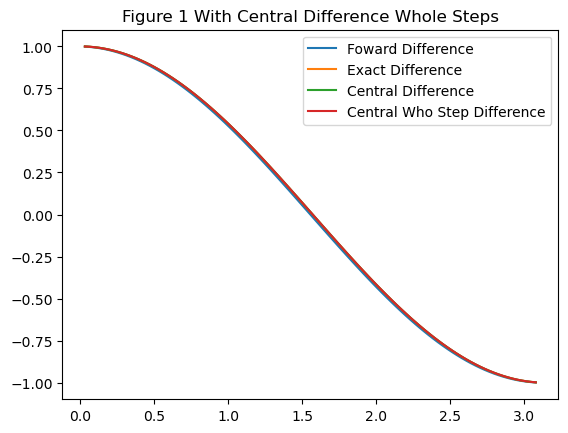

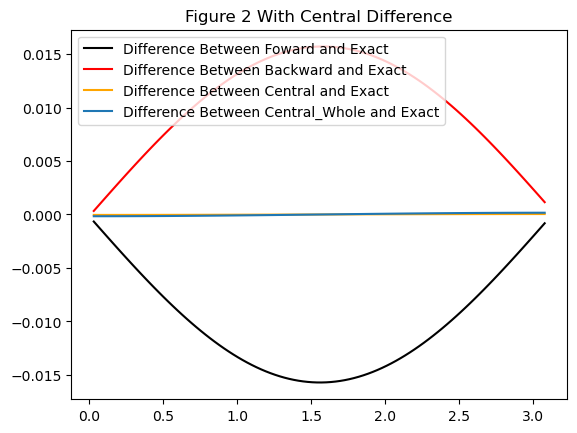

In [7]:
# define a function that use central difference
# to get the derivative value at a point with whole steps
def central_difference_100(n):
    return (sin(n+pi/100)-sin(n-pi/100))/(pi/50)

# get the derivative value of a point by whole steps central difference
y_cent_100 = numpy.array(list(map(lambda i: central_difference_100(i),x_fow)))

# plot the digram (Figure 1) with whole steps central difference
plt.plot(x_fow,y_fow,label='Foward Difference')
plt.plot(x_fow,y_cos,label='Exact Difference')
plt.plot(x_fow,y_cent,label='Central Difference')
plt.plot(x_fow,y_cent_100,label='Central Who Step Difference')
plt.title("Figure 1 With Central Difference Whole Steps")
plt.legend(loc='best')
plt.show()

# get the difference between wjole steps central difference estimate and the exact derivative
y_d3 = numpy.array(list(map(lambda i: central_difference_100(i)-cos(i),x_fow)))

# plot the digram (Figure 2) with whole steps central difference
plt.plot(x_fow,y_d0,c='black',label='Difference Between Foward and Exact')
plt.plot(x_fow,y_d1,c='red',label='Difference Between Backward and Exact')
plt.plot(x_fow,y_d2,c='orange',label='Difference Between Central and Exact')
plt.plot(x_fow,y_d3,label='Difference Between Central_Whole and Exact')
plt.title("Figure 2 With Central Difference")
plt.legend(loc='best')
plt.show()

By the end of the exercise, figures 1 and 2 should each contain 
four sets of values, for the four different methods. **(Ok well actually the way I did it, I had to regenerate the plot each time - the plot below is figure 2 with all four curves.)**

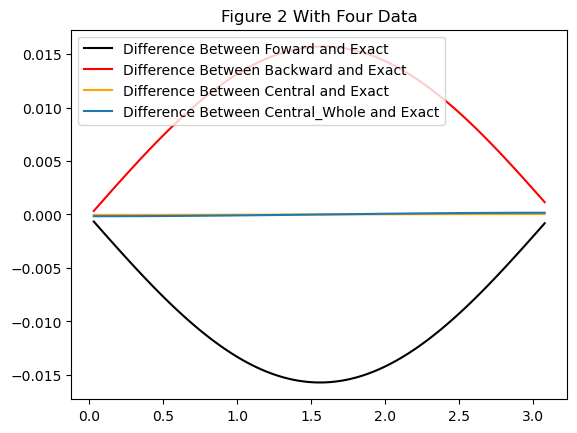

In [8]:
# plot diagram with four method differenct between estimate and exact derivate value
plt.plot(x_fow,y_d0,c='black',label='Difference Between Foward and Exact')
plt.plot(x_fow,y_d1,c='red',label='Difference Between Backward and Exact')
plt.plot(x_fow,y_d2,c='orange',label='Difference Between Central and Exact')
plt.plot(x_fow,y_d3,label='Difference Between Central_Whole and Exact')
plt.title("Figure 2 With Four Data")
plt.legend(loc='best')
plt.show()

The only problem is the errors from the central differences are too small to see on the scale of the other errors. We could take absolute values and log things to compare them more easily:

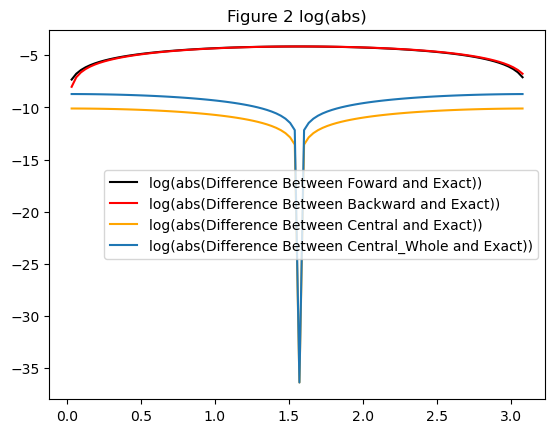

In [9]:
# get four method difference between estimate and exact derivate value
# and take the absloute value then take the log
y_d0_1 = numpy.log(numpy.array(list(map(lambda i: abs(forward_difference(i)-cos(i)),x_fow))))
y_d1_1 = numpy.log(numpy.array(list(map(lambda i: abs(backward_difference(i)-cos(i)),x_fow))))
y_d2_1 = numpy.log(numpy.array(list(map(lambda i: abs(central_difference(i)-cos(i)),x_fow))))
y_d3_1 = numpy.log(numpy.array(list(map(lambda i: abs(central_difference_100(i)-cos(i)),x_fow))))

# plot diagram with log(abs(four method differenct between estimate and exact derivate value))
plt.plot(x_fow,y_d0_1,c='black',label='log(abs(Difference Between Foward and Exact))')
plt.plot(x_fow,y_d1_1,c='red',label='log(abs(Difference Between Backward and Exact))')
plt.plot(x_fow,y_d2_1,c='orange',label='log(abs(Difference Between Central and Exact))')
plt.plot(x_fow,y_d3_1,label='log(abs(Difference Between Central_Whole and Exact))')
plt.title("Figure 2 log(abs)")
plt.legend(loc='best')
plt.show()

Note the derivative, $cos(x)$, goes to zero in the middle of the range; the approximation also goes to zero, so the difference between the two goes to $10^{-16}$ (i.e. zero within roundoff errors).